In [ ]:
# AULA DE CHURN PREDICTION
# Instrutor: Matheus Araújo - matheusaraujo.com
# 
# CóDIGO BASEADO NO KERNEL DO KAGGLE: https://www.kaggle.com/pavanraj159/telecom-customer-churn-prediction

In [22]:
# Detalhes do Python Notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [144]:
# Importando bibliotecas do python
%matplotlib inline
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt


In [139]:
# Variaveis uteis
pie_size = (8,4)

In [169]:
#Definicao de funcoes auxiliares
def show_nunique_dtypes_from_df(df):
    types_series = df.dtypes
    types_series.name = "type"
    uniques_series = df.nunique()
    uniques_series.name = "# unique"
    display (pd.DataFrame([uniques_series, types_series]).T)
    
def plot_pie_chart_churning_not_churning(df, column):
    # Selecionar indexes de clientes que "Churn" e não "Churn"
    fig = plt.figure()
    churn_index = telecom_df[telecom_df["Churn"] == True].index
    not_churn_index = telecom_df[telecom_df["Churn"] == False].index
    plt.subplot(1, 2, 1)
    display(pd.Series(telecom_df[column].loc[churn_index].value_counts().sort_index(), name="Churning").plot.pie(figsize=pie_size))
    plt.subplot(1, 2, 2)
    display(pd.Series(telecom_df[column].iloc[not_churn_index].value_counts().sort_index(), name="Not Churning").plot.pie(figsize=pie_size))
    fig.suptitle(column)

In [52]:
# Lendo conjunto de dados que vamos trabalhar
telecom_df = pd.read_csv("telecom.csv")
print("Formato do Conjunto de Dados: ", telecom_df.shape)
display(telecom_df.head(5))


Formato do Conjunto de Dados:  (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [53]:
# Checando quais tipos de entrada temos para a coluna Churn
print(telecom_df["Churn"].unique())

['No' 'Yes']


In [57]:
# Tornando coluna Churn tipo Boolean
telecom_df["Churn"] = telecom_df["Churn"].replace({"No":False,"Yes":True})

In [58]:
# Analise Basica - Contanto valores nulos e únicos
print ("Missing values :  ", telecom_df.isnull().sum().values.sum())
show_nunique_dtypes_from_df(telecom_df)

Missing values :   0


,# unique,type
customerID,7043,object
gender,2,object
SeniorCitizen,2,int64
Partner,2,object
Dependents,2,object
tenure,73,int64
PhoneService,2,object
MultipleLines,3,object
InternetService,3,object
OnlineSecurity,3,object


In [82]:
# Limpando os dados

# Consertando coluna TotalChanges e convertendo para Float
telecom_df['TotalCharges'] = telecom_df["TotalCharges"].replace(" ",np.nan)
telecom_df = telecom_df[telecom_df["TotalCharges"].notnull()] # Removendo valores com nulos
telecom_df = telecom_df.reset_index()[telecom_df.columns]
telecom_df["TotalCharges"] = telecom_df["TotalCharges"].astype(float)

#Mudar valores de Senior Citizen para categoricos
telecom_df["SeniorCitizen"] = telecom_df["SeniorCitizen"].replace({1:True,0:False})

print ("Missing values :  ", telecom_df.isnull().sum().values.sum())
print("Formatado do conjunto de dados:", telecom_df.shape)
show_nunique_dtypes_from_df(telecom_df)


Missing values :   0
Formatado do conjunto de dados: (7032, 21)


,# unique,type
customerID,7032,object
gender,2,object
SeniorCitizen,2,bool
Partner,2,object
Dependents,2,object
tenure,72,int64
PhoneService,2,object
MultipleLines,3,object
InternetService,3,object
OnlineSecurity,3,object


In [160]:
# Separar coluna por tipos
category_features = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "Contract", "PaperlessBilling", "PaymentMethod"] 
numeric_features = ["tenure", "MonthlyCharges", "TotalCharges"]

Labels: 	 [False, True]
Labels Count: 	 [5163, 1869]
Churning Percentage: 	26.58%


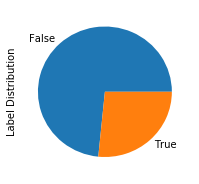

In [117]:
labels = telecom_df["Churn"].value_counts().keys().tolist()
labels_count = telecom_df["Churn"].value_counts().values.tolist()
print("Labels: \t", labels)
print("Labels Count: \t", labels_count)
print("Churning Percentage: \t{}%".format(round(labels_count[1] / (labels_count[1] + labels_count[0])*100, 2)))
label_distribution_series = pd.Series(labels_count, index = labels, name="Label Distribution")
display(pd.Series(labels_count, index = labels, name="Label Distribution").plot.pie(figsize=pie_size))


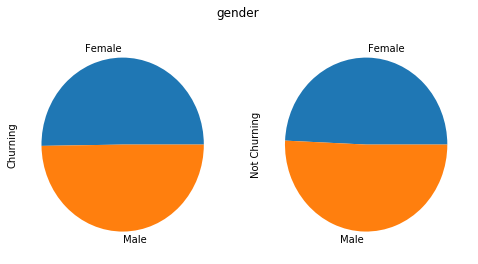

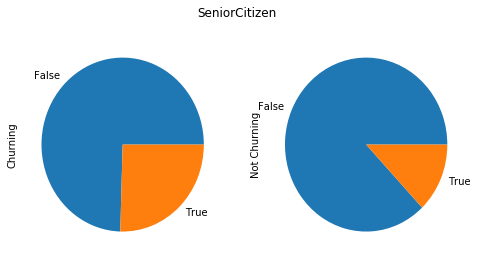

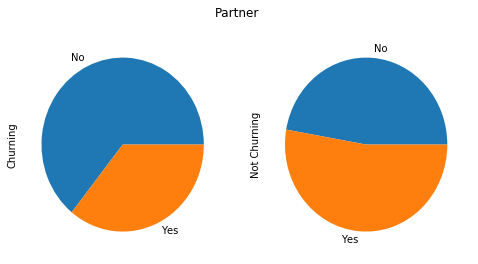

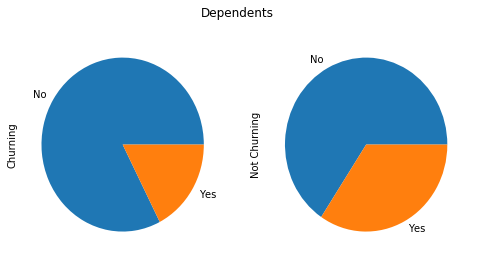

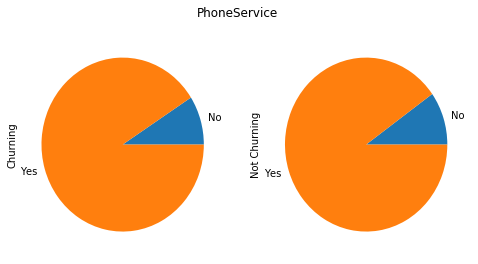

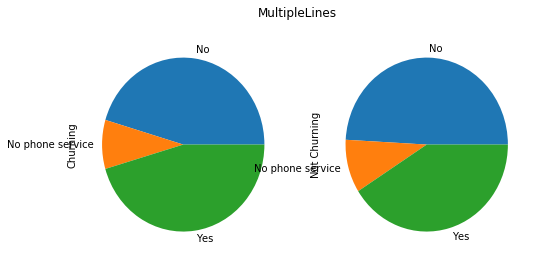

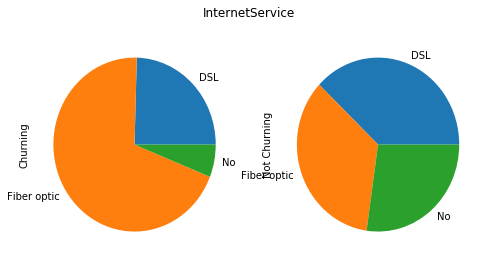

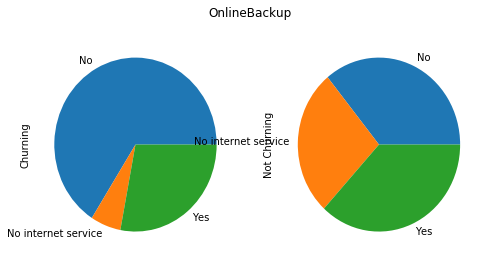

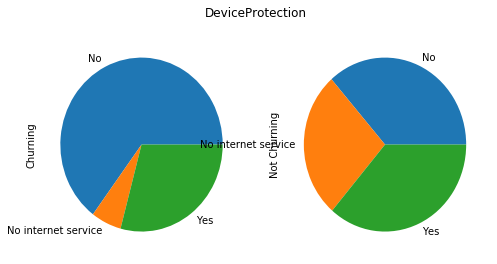

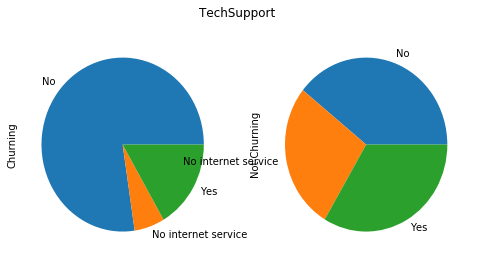

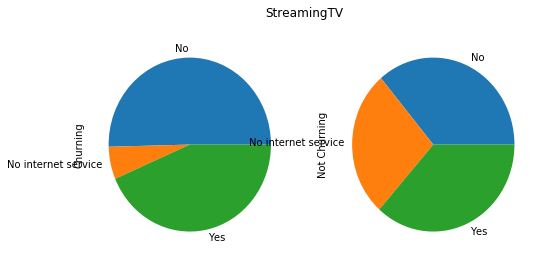

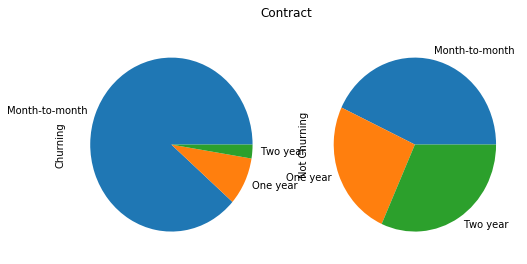

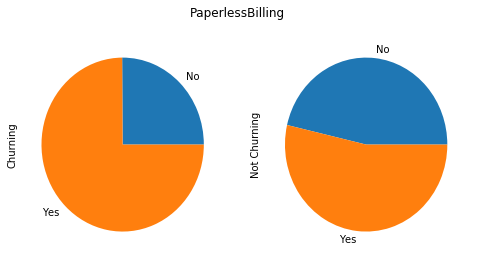

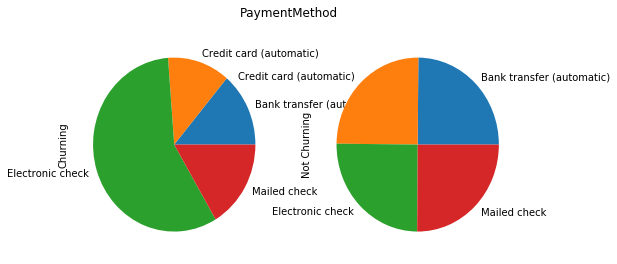

In [170]:
for column in category_features:
    plot_pie_chart_churning_not_churning(telecom_df, column)


In [110]:
# #replace 'No internet service' to No for the following columns
# replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
#                 'TechSupport','StreamingTV', 'StreamingMovies']
# for i in replace_cols : 
#     telcom[i]  = telcom[i].replace({'No internet service' : 'No'})
    
# telecom_df["tenure"].plot()

#Tenure to categorical column
# def tenure_lab(telcom) :
    
#     if telcom["tenure"] <= 12 :
#         return "Tenure_0-12"
#     elif (telcom["tenure"] > 12) & (telcom["tenure"] <= 24 ):
#         return "Tenure_12-24"
#     elif (telcom["tenure"] > 24) & (telcom["tenure"] <= 48) :
#         return "Tenure_24-48"
#     elif (telcom["tenure"] > 48) & (telcom["tenure"] <= 60) :
#         return "Tenure_48-60"
#     elif telcom["tenure"] > 60 :
#         return "Tenure_gt_60"
# telcom["tenure_group"] = telcom.apply(lambda telcom:tenure_lab(telcom),
#                                       axis = 1)


# #Separating catagorical and numerical columns
# Id_col     = ['customerID']
# target_col = ["Churn"]
# cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()
# cat_cols   = [x for x in cat_cols if x not in target_col]
# num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]

Month-to-month    1655
One year           166
Two year            48
Name: Contract, dtype: int64